In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from sklearn.model_selection import cross_val_score, KFold
warnings.filterwarnings("ignore")

In [2]:
# Downloading the CSV file
url = "https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/World%20Happiness/happiness_score_dataset.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [46]:
# Acknowledging the unique value in each column of the dataset
df.nunique().to_frame("Unique Values")

,Unique Values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


Exploratory Data Analysis (EDA)

In [7]:
categorical_data = []
for item in df.dtypes.index:
    if df.dtypes[item] == 'O':
        categorical_data.append(item)
print(categorical_data)

numeric_data = []
for stuff in df.dtypes.index:
    if df.dtypes[stuff] == 'int64' or df.dtypes[stuff] == 'float64':
        numeric_data.append(stuff)
print(numeric_data)

['Country', 'Region']
['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


The interation shows that the data contain categorical and numerical variables.

In [8]:
# Checking for missing value
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

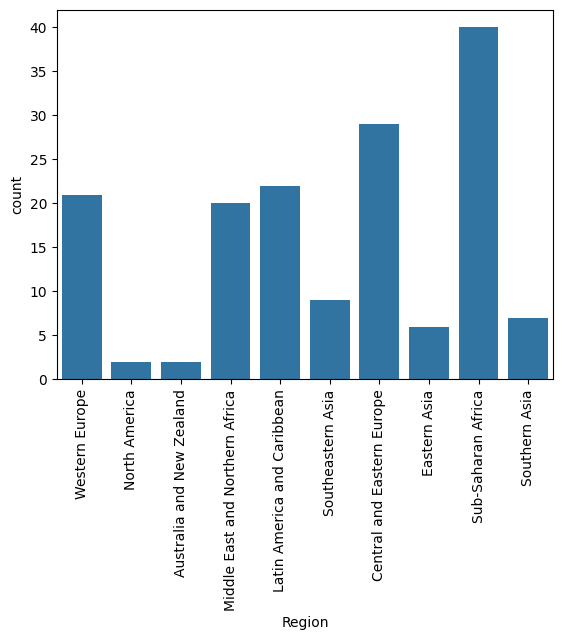

In [18]:
#sns.distplot(df['Region']) DataFrame containing the 'Region' column
# Assuming 'df' is your DataFrame containing the 'Region' column
sns.countplot(x='Region', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [14]:
#Region explicit information
df['Region'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 158 entries, 0 to 157
Series name: Region
Non-Null Count  Dtype 
--------------  ----- 
158 non-null    object
dtypes: object(1)
memory usage: 1.4+ KB


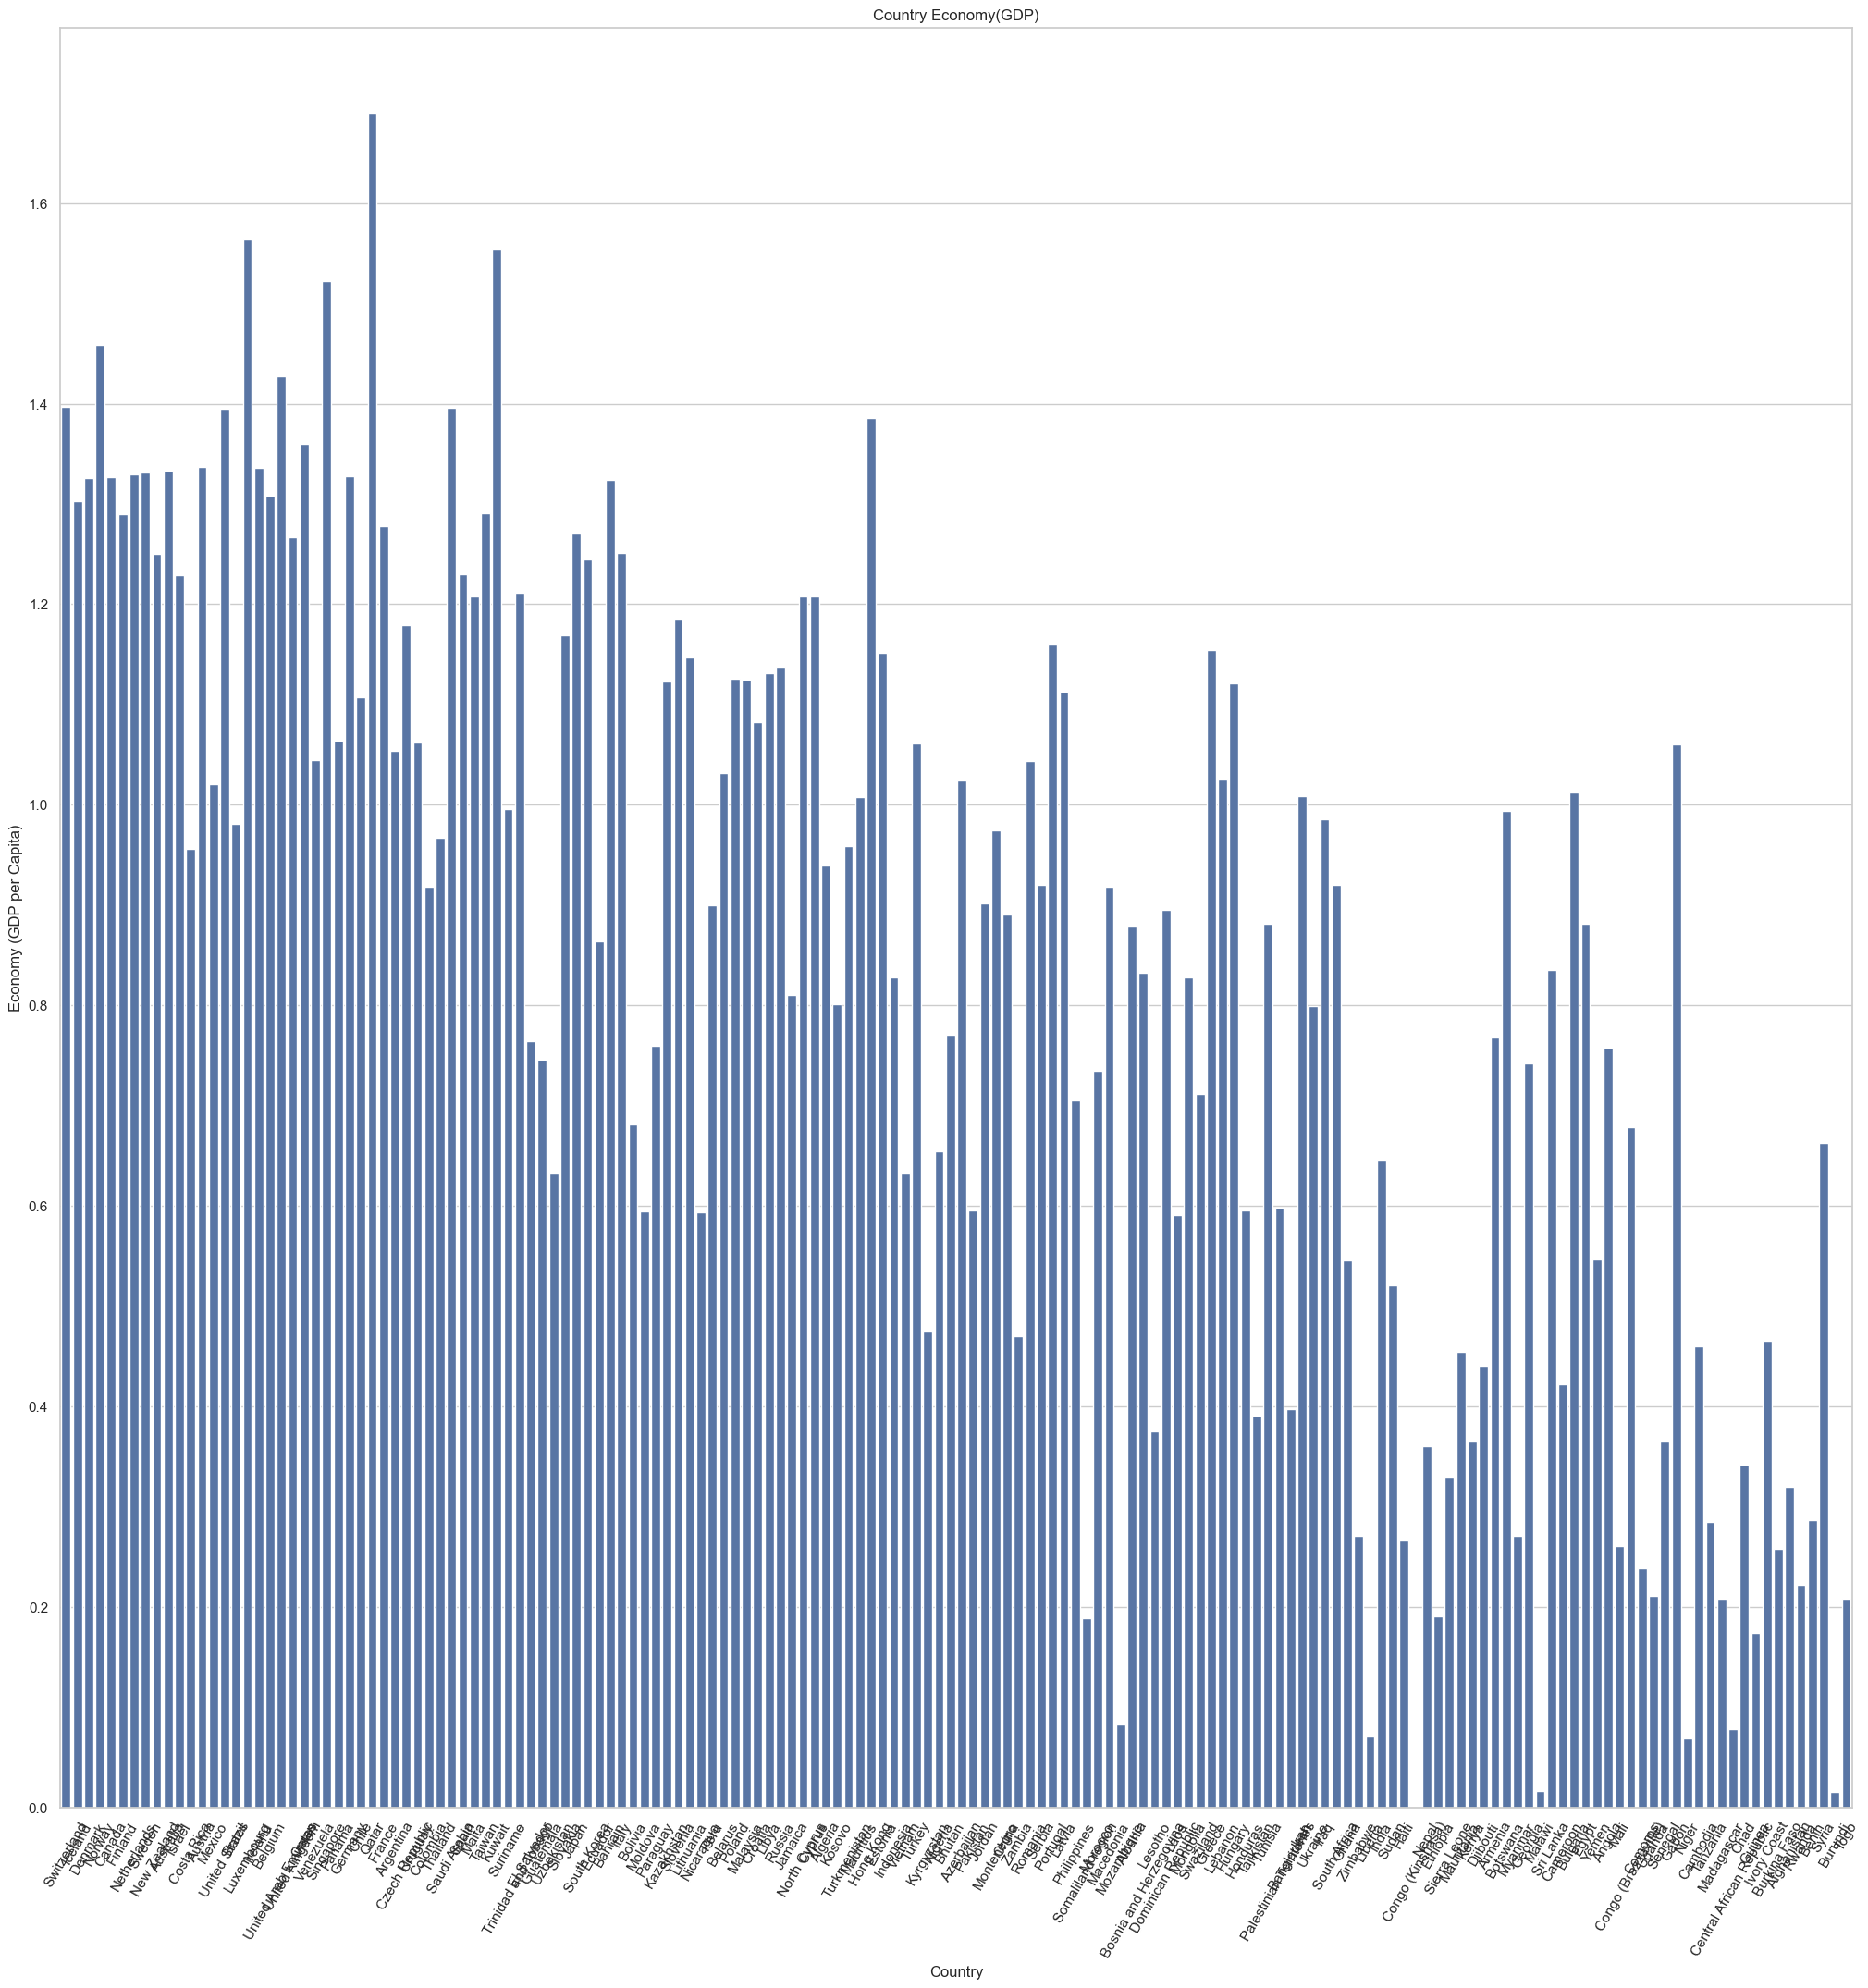

In [36]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (25,25))
sns.barplot(x='Country', y = 'Economy (GDP per Capita)',data=df)
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.title('Country Economy(GDP)')
plt.show()

In [16]:
df['Country']

0      Switzerland
1          Iceland
2          Denmark
3           Norway
4           Canada
          ...     
153         Rwanda
154          Benin
155          Syria
156        Burundi
157           Togo
Name: Country, Length: 158, dtype: object

In [31]:
# Numerical Data Exploration
nd = df[['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
nd.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,2.150249,0.03411,0.874014,0.854207,0.663425,0.510167,0.350502,0.259884,1.257716
1,2,2.147217,0.04884,0.833917,0.876397,0.666721,0.487825,0.132299,0.362070,1.308876
2,3,2.143238,0.03328,0.843926,0.858907,0.628417,0.500399,0.394451,0.293706,1.250486
3,4,2.142651,0.03880,0.899755,0.846276,0.634039,0.512662,0.311176,0.297872,1.242802
4,5,2.131441,0.03553,0.844275,0.842692,0.644813,0.490400,0.284856,0.377141,1.238884


In [32]:
nd.tail()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,154,1.496269,0.03464,0.200554,0.573068,0.356723,0.464997,0.439486,0.203985,0.513075
154,155,1.467874,0.03656,0.252042,0.302960,0.276950,0.395078,0.077054,0.167715,0.968230
155,156,1.387793,0.05015,0.508743,0.388583,0.543446,0.145692,0.173163,0.386479,0.284111
156,157,1.362258,0.08658,0.015184,0.347744,0.202092,0.111989,0.095874,0.180044,1.041343
157,158,1.345212,0.06727,0.189529,0.130984,0.250315,0.310810,0.101934,0.154274,0.942839


In [40]:
nd.skew()

Happiness Rank                   0.000418
Happiness Score                 -0.263231
Standard Error                   1.983439
Economy (GDP per Capita)        -0.680880
Family                          -1.517141
Health (Life Expectancy)        -0.984733
Freedom                         -0.652247
Trust (Government Corruption)    1.180922
Generosity                       0.650767
Dystopia Residual               -1.073996
dtype: float64

The skewness values indicate the asymmetry of the distribution of each variable in the dataset. 
Skewness measures the lack of symmetry in a dataset's distribution.

Happiness Rank: The skewness value is close to zero, indicating a nearly symmetric distribution.

    Happiness Score: The skewness value is positive but close to zero, indicating a slightly right-skewed distribution. 
This means that there might be a few countries with very high happiness scores.

    Standard Error: The skewness value is positive, indicating a right-skewed distribution. This suggests that there might be a few countries
with higher standard errors.

    Economy (GDP per Capita): The skewness value is negative, indicating a left-skewed distribution. This means that there might be a few 
countries with very low GDP per capita.

    Family: The skewness value is negative, indicating a left-skewed distribution. This suggests that there might be a few countries with 
very low family scores.

    Health (Life Expectancy): The skewness value is negative, indicating a left-skewed distribution. This means that there might be
a few countries with very low life expectancy.

    Freedom: The skewness value is negative, indicating a left-skewed distribution. This suggests that there might be a few countries
with very low freedom scores.

    Trust (Government Corruption): The skewness value is positive, indicating a right-skewed distribution. This means that there might 
be a few countries with higher trust in government corruption.
Generosity: The skewness value is positive, indicating a right-skewed distribution. This suggests that there might be a few 
countries with higher generosity scores.

    Dystopia Residual: The skewness value is negative but close to zero, indicating nearly symmetric distribution.
Based on these skewness values, you can infer the shape of the distribution for each variable and understand its characteristics.

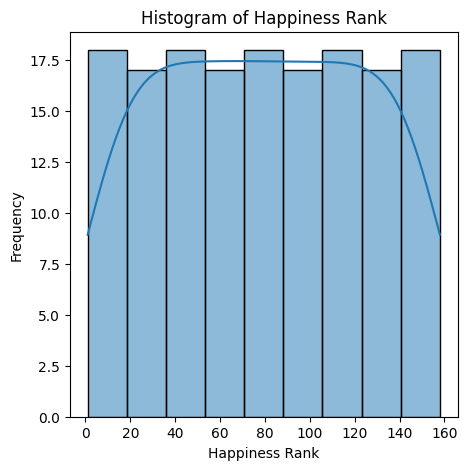

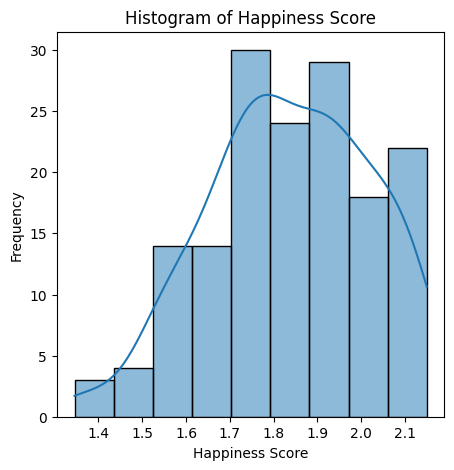

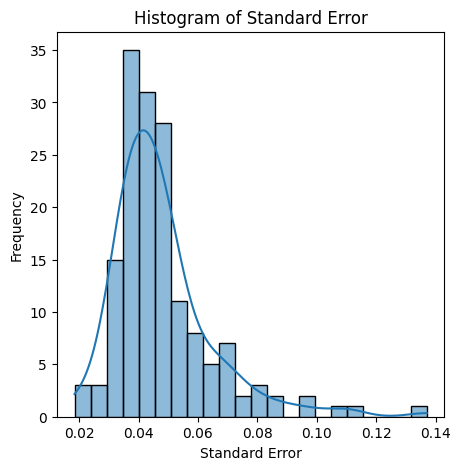

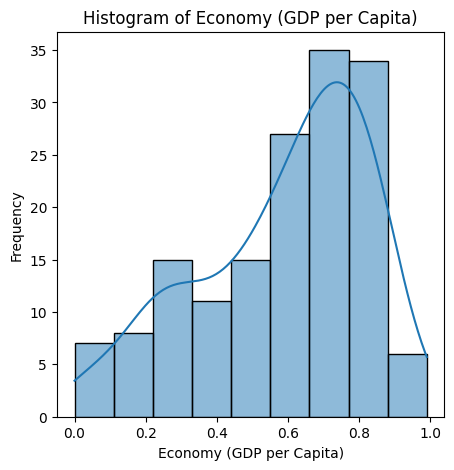

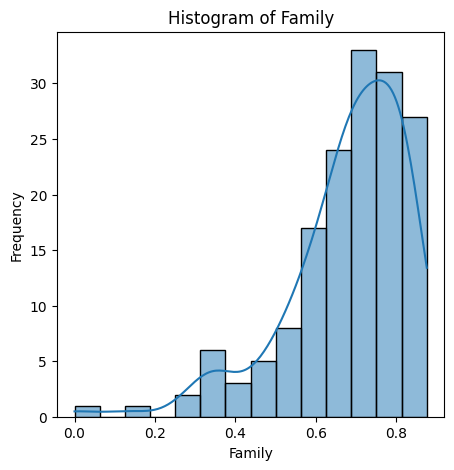

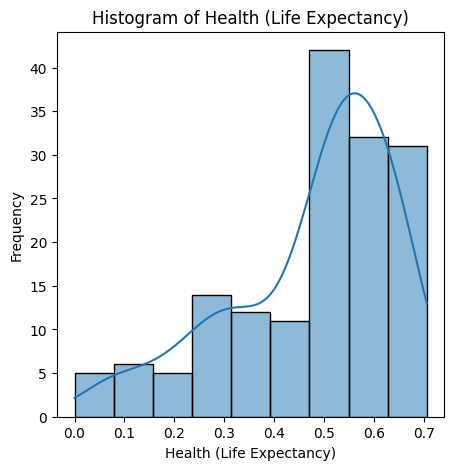

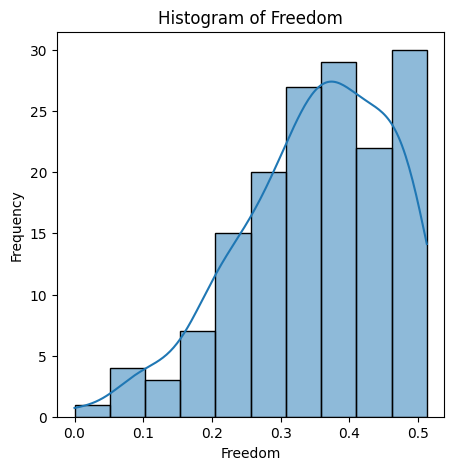

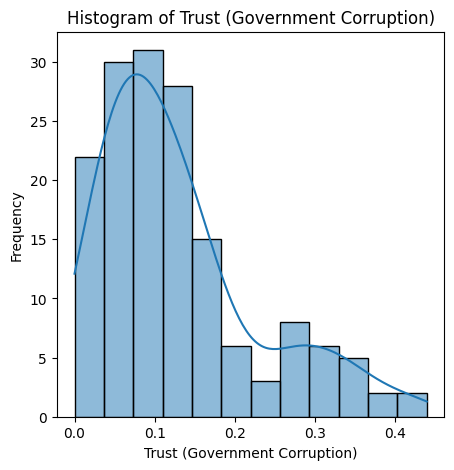

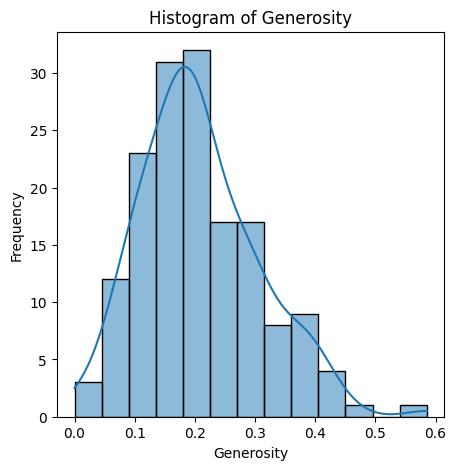

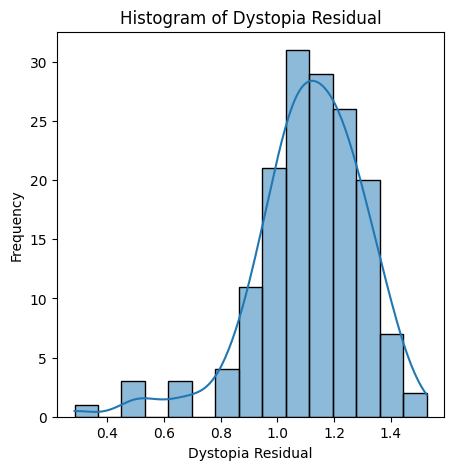

In [34]:
# Get the list of columns in the DataFrame
columns = df.columns
# Check the data type of the column
for column in columns:
    dtype = df[column].dtype
    # If it's a numerical variable, create a histogram
    if dtype =='int64' or dtype == 'float64':
        plt.figure(figsize = (5,5))
        sns.histplot(df[column], kde = True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
        
    

I will be applying logarithmic transformation to the variables:

Trust (Government Corruption), Generosity, Dystopia Residual:
Family, Health (Life Expectancy), Freedom:
Economy (GDP per Capita): 
Happiness Score:

FEATURE ENGINEERING

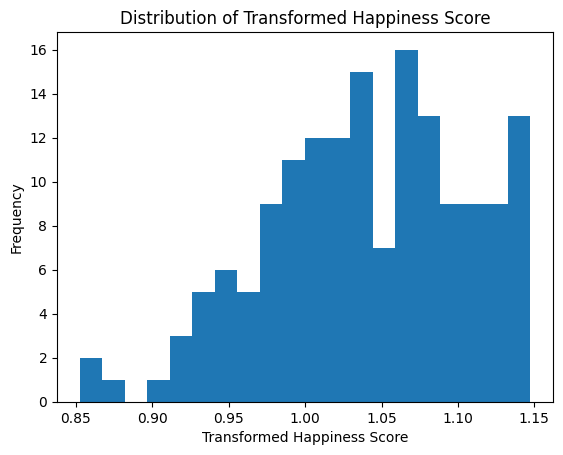

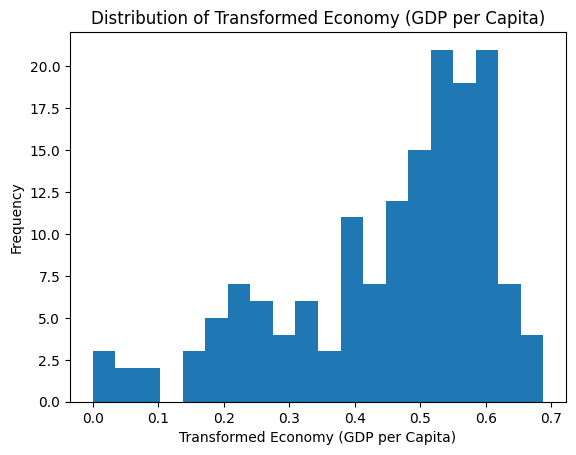

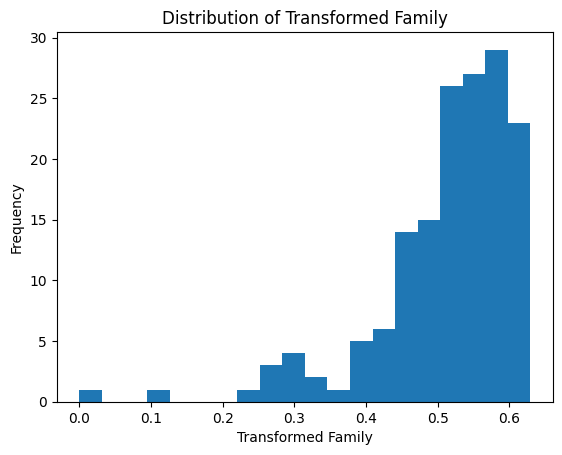

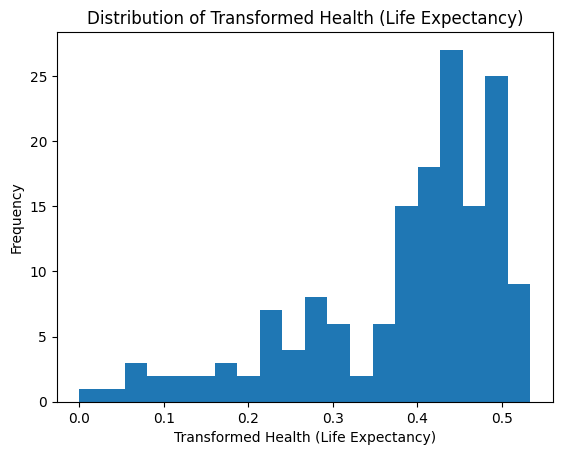

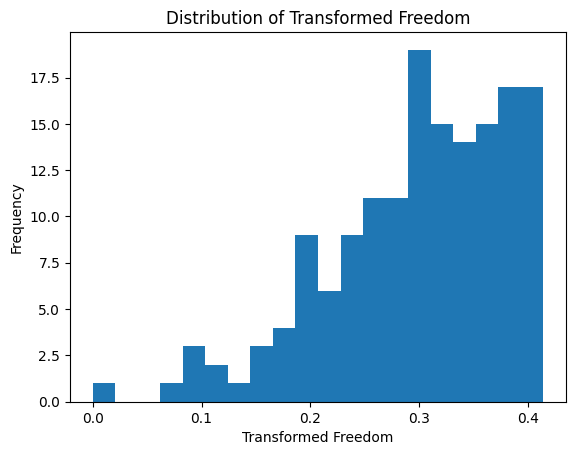

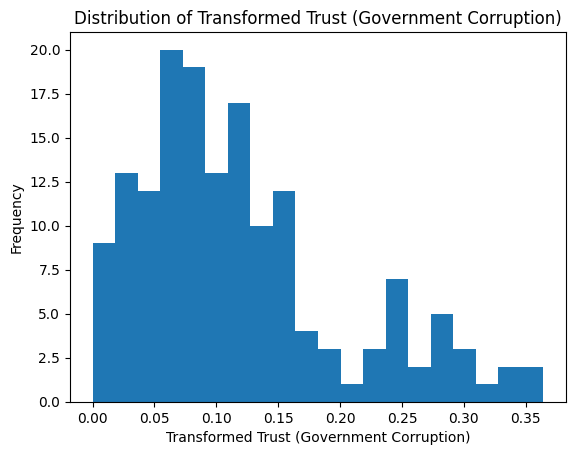

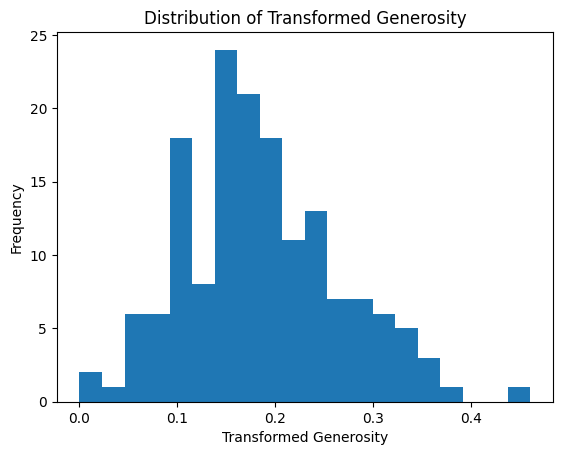

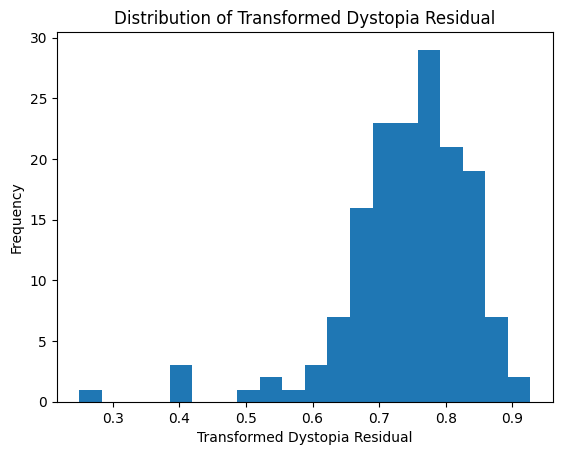

In [35]:
# Define columns to transform
columns_to_transform = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 
                        'Health (Life Expectancy)', 'Freedom', 
                        'Trust (Government Corruption)', 'Generosity', 
                        'Dystopia Residual']

# Apply log transformation to specified columns
df[columns_to_transform] = df[columns_to_transform].applymap(lambda x: np.log(x + 1))

# Check the distribution of the transformed variables
for col in columns_to_transform:
    plt.hist(df[col], bins=20)
    plt.xlabel('Transformed ' + col)
    plt.ylabel('Frequency')
    plt.title('Distribution of Transformed ' + col)
    plt.show()


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [41]:
df[columns_to_transform].skew()

Happiness Score                 -0.408790
Economy (GDP per Capita)        -0.945968
Family                          -1.978212
Health (Life Expectancy)        -1.206147
Freedom                         -0.860886
Trust (Government Corruption)    1.014253
Generosity                       0.400049
Dystopia Residual               -1.640867
dtype: float64

In [47]:
#'nd' contains your numerical data
num_list = nd
q1 = nd.quantile(0.25)
q3 = nd.quantile(0.75)
iqr = q3-q1
outlier_conditions = (( num_list < (q1 - 1.5 * iqr)) | (num_list > (q3 + 1.5 * iqr)))

# Display rows containing outliers
outliers = df[outlier_conditions.any(axis=1)]
print("Rows with outliers:")
print(outliers)


Rows with outliers:
                      Country                           Region  \
0                 Switzerland                   Western Europe   
2                     Denmark                   Western Europe   
5                     Finland                   Western Europe   
7                      Sweden                   Western Europe   
8                 New Zealand        Australia and New Zealand   
19       United Arab Emirates  Middle East and Northern Africa   
23                  Singapore                Southeastern Asia   
27                      Qatar  Middle East and Northern Africa   
39                   Suriname      Latin America and Caribbean   
40        Trinidad and Tobago      Latin America and Caribbean   
62                      Libya  Middle East and Northern Africa   
64                    Jamaica      Latin America and Caribbean   
71                  Hong Kong                     Eastern Asia   
80                   Pakistan                    Souther

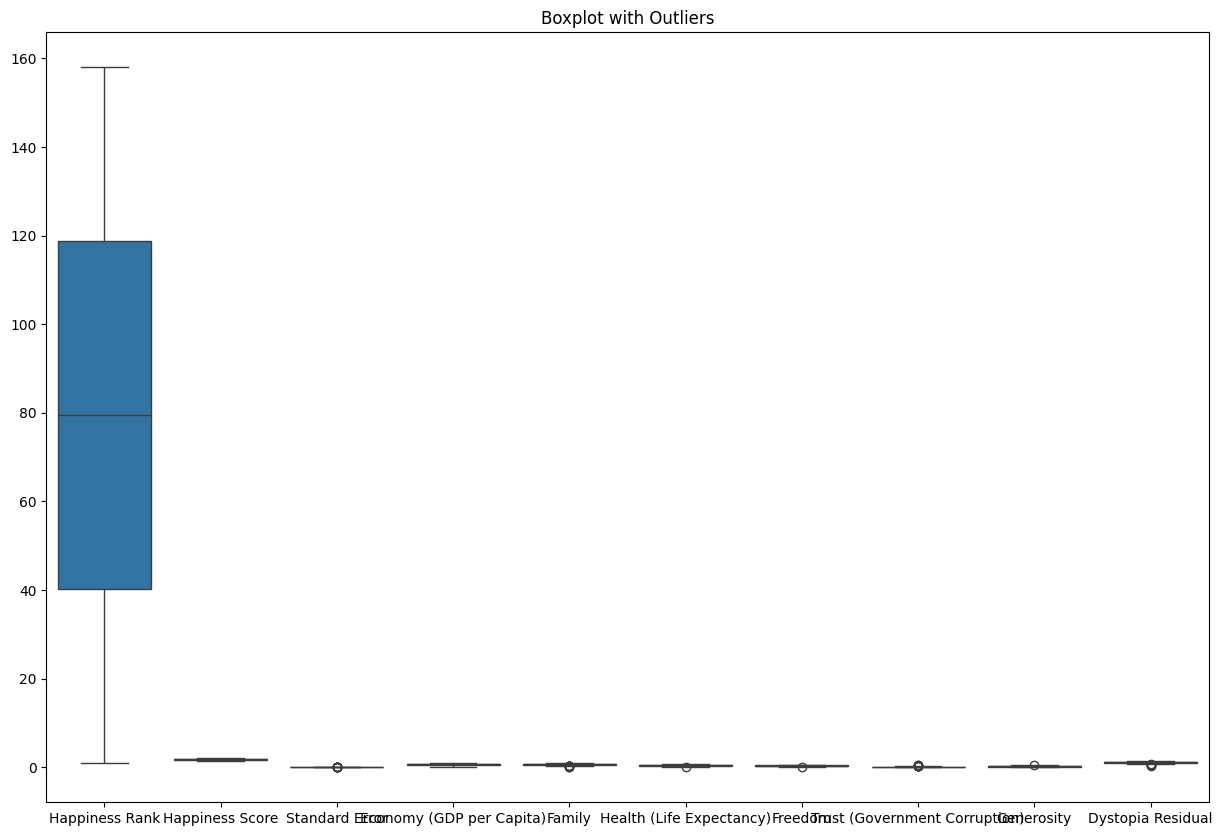

In [52]:
# Visualize the outliers using a boxplot
plt.figure(figsize=(15, 10))  # Adjusting the size of the figure
sns.boxplot(data=num_list)
plt.title("Boxplot with Outliers")
plt.show()

This analysis will not remove or replace any outliers in this case. The outliers are not extreme, as visualized earlier, so I will 
continue to use the data as it is.

In [54]:
# Specify the random state for reproducibility
random_state = 45  
X = df.drop('Happiness Score', axis = 1)
y = df['Happiness Score']
# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Region', 'Country'], drop_first=True)

# Standardize features
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20 )

In [55]:
# Print the shapes of the training and testing sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (126, 175)
Shape of X_test: (32, 175)
Shape of y_train: (126,)
Shape of y_test: (32,)


Based on the project description, It is expected to use all the variables provided in the dataset to predict the happiness score.
These variables include GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption, and Dystopia Residual.

    Each of these variables contributes to the evaluation of happiness in each country, and considering all of them in the predictive model
allows us to capture the multidimensional nature of happiness as assessed in the World Happiness Report.
    Using all the variables to model also enables us to explore the relationships between various factors and the happiness score, which can help 
us build a more comprehensive and accurate predictive model. 
    Additionally, by including all the variables, you can ensure that you're considering the full range of factors that may influence happiness 
levels across different countries.

In [62]:
# Modelling
random_state = 45

# Define models
grad_boost_model = GradientBoostingRegressor(random_state=random_state)
svm_model = SVR(kernel='linear')

# Define k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=random_state)

# Perform k-fold cross-validation for Gradient Boosting Regression
grad_boost_scores = cross_val_score(grad_boost_model, X_train, y_train, cv=k_fold, scoring='neg_mean_squared_error')
grad_boost_mse = -grad_boost_scores.mean()  # Convert negative MSE to positive
grad_boost_r2 = cross_val_score(grad_boost_model, X_train, y_train, cv=k_fold, scoring='r2').mean()

# Perform k-fold cross-validation for Support Vector Machine (SVM)
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=k_fold, scoring='neg_mean_squared_error')
svm_mse = -svm_scores.mean()  # Convert negative MSE to positive
svm_r2 = cross_val_score(svm_model, X_train, y_train, cv=k_fold, scoring='r2').mean()

# Print the results
print("Gradient Boosting Regression:")
print(f"  Mean Squared Error: {grad_boost_mse:.4f}")
print(f"  R-squared: {grad_boost_r2:.4f}")
print("\nSupport Vector Machine (SVM):")
print(f"  Mean Squared Error: {svm_mse:.4f}")
print(f"  R-squared: {svm_r2:.4f}")


Gradient Boosting Regression:
  Mean Squared Error: 0.0000
  R-squared: 0.9916

Support Vector Machine (SVM):
  Mean Squared Error: 0.0033
  R-squared: 0.2936


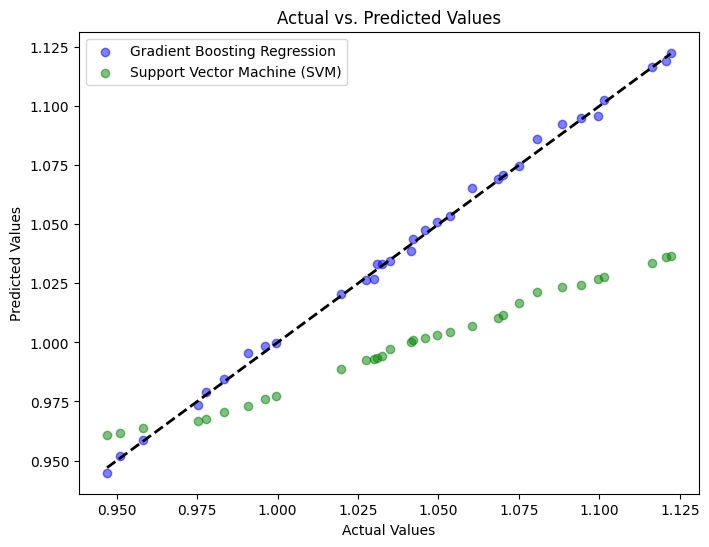

In [66]:
# Define models (assuming they have been trained already)
grad_boost_model = GradientBoostingRegressor(random_state=random_state)
svm_model = SVR(kernel='linear')

# Train the models (assuming X_train and y_train are defined)
grad_boost_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_grad_boost = grad_boost_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_grad_boost, color='blue', alpha=0.5, label='Gradient Boosting Regression')
plt.scatter(y_test, y_pred_svm, color='green', alpha=0.5, label='Support Vector Machine (SVM)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

Interpretaions:
     Gradient Boosting Regression Model:
This model shows exceptional performance with very low mean squared error (MSE) and a high R-squared value. It indicates that the model's 
predictions are very close to the actual values, and it explains a large portion of the variability in the target variable. Thus, 
the Gradient Boosting Regression model appears to be well-suited for your dataset.

    Support Vector Machine (SVM) Model:
While the SVM model also performs reasonably well, it has a higher MSE and a lower R-squared value compared to the Gradient Boosting Regression model. 
This suggests that the SVM model's predictions have more error on average, and it explains only a small portion of the variability in the target
variable.

Limitation:
Overfitting: Gradient Boosting models can be prone to overfitting, especially if hyperparameters are not properly tuned or if the model complexity
is too high relative to the amount of data available. Regularization techniques and careful tuning of hyperparameters are necessary to mitigate
overfitting.
With a small dataset, there may be fewer data points available for model training, hyperparameter tuning, and model validation. This can make it 
challenging to find the optimal combination of hyperparameters or to perform robust cross-validation, leading to suboptimal model performance.

Conclusion: 
Based on these results, the Gradient Boosting Regression model seems to outperform the Support Vector Machine (SVM) model in terms of
both mean squared error and R-squared. This suggests that the Gradient Boosting Regression model provides better predictions for your dataset.
Also it's important to note that k-fold cross-validation provides a more robust estimate of model performance compared to a single train-test split. 
Therefore, the results obtained from k-fold cross-validation are generally more reliable for assessing the generalization ability of the models.

In [60]:
# Define hyperparameter grids for Gradient Boosting Regression
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Define hyperparameter grids for Support Vector Machine (SVM)
svm_param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Perform grid search for Gradient Boosting Regression
gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=random_state), gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_

# Perform grid search for Support Vector Machine (SVM)
svm_grid_search = GridSearchCV(SVR(), svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)
best_svm_model = svm_grid_search.best_estimator_

# Predict using the best models
y_pred_gb = best_gb_model.predict(X_test)
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the best models
evaluate_model(y_test, y_pred_gb, "Gradient Boosting Regression (Best Model)")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine (Best Model)")

Gradient Boosting Regression (Best Model):
  Mean Squared Error: 0.0000
  R-squared: 0.9979
Support Vector Machine (Best Model):
  Mean Squared Error: 0.0000
  R-squared: 0.9827


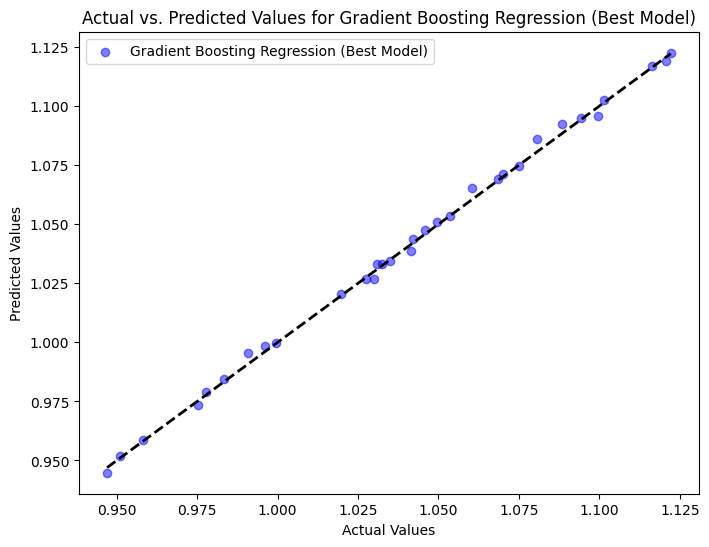

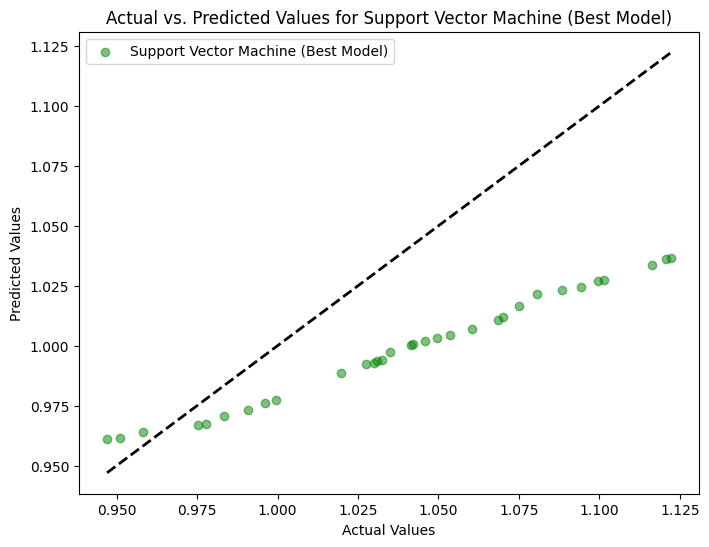

In [67]:
# Plot actual vs. predicted values for Gradient Boosting Regression (Best Model)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color='blue', alpha=0.5, label='Gradient Boosting Regression (Best Model)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Gradient Boosting Regression (Best Model)')
plt.legend()
plt.show()

# Plot actual vs. predicted values for Support Vector Machine (Best Model)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svm, color='green', alpha=0.5, label='Support Vector Machine (Best Model)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Support Vector Machine (Best Model)')
plt.legend()
plt.show()


The Gradient Boosting Regression model demonstrates exceptional performance with an MSE of 0.0000 and an R-squared of 0.9979, indicating precise
predictions and high explanatory power. However, its complexity and potential overfitting risk may pose challenges with small datasets.

    Conversely, the Support Vector Machine model exhibits good performance, albeit with slightly lower R-squared (0.9827), suggesting reasonable 
prediction accuracy. Nonetheless, its interpretability and computational demands may limit its practicality. 

In conclusion, while both models perform well, Gradient Boosting Regression stands out for its superior predictive accuracy, despite potential 
overfitting concerns.

In [ ]:
What is insightful in this Research: 
The high performance of the predictive models suggests that the factors considered in the World Happiness Report, such as GDP per Capita, Family,
Life Expectancy, Freedom, Generosity, Trust Government Corruption, and Dystopia Residual, indeed play significant roles in evaluating and
predicting happiness levels across countries.

In summary, the project description highlights the significance of happiness indicators in informing policy decisions, the utility of happiness metrics
in assessing national progress, the importance of benchmarking with Dystopia, and the effectiveness of comprehensive predictive modeling incorporating
various contributing factors. These insights reinforce the value of the World Happiness Report and its implications for understanding and promoting
well-being globally.